In [2]:
import torchvision

url = "https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz"
filename = "cifar-100-python.tar.gz"
tgz_md5 = "eb9058c3a382ffc7106e4002c42a8d85"
datasetRoot = "Data/"

torchvision.datasets.utils.download_and_extract_archive(url, datasetRoot, filename=filename, md5=tgz_md5)


0.0%

100.0%


Extracting Data/cifar-100-python.tar.gz to Data/


In [1]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [19]:
import pickle
import torchvision
from PIL import Image
from torchvision import transforms

def load_external_image(target_dataset, class_type, original_label):
    dict = unpickle("Data/cifar-100-python/train")
    labels = unpickle("Data/cifar-100-python/meta")
    # get the data of the first picture whose label is the same as the original label
    images = []
    if class_type == b"fine_labels":
        target_label_index = labels[b'fine_label_names'].index(original_label)
    else:
        target_label_index = labels[b'coarse_label_names'].index(original_label)
    
    for i in range(len(dict[class_type])):
        if dict[class_type][i] == target_label_index:
            img_data = dict[b'data'][i]
            img_data = img_data.reshape(3, 32, 32).transpose(1, 2, 0)
            img = Image.fromarray(img_data)
            images.append(img)
    
    img = Image.fromarray(img_data)

    if target_dataset == "cifar10":
        transform = transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
        ])
    transformed_images = [transform(img) for img in images]
    return transformed_images

In [21]:
imgs = load_external_image("cifar10", b'fine_labels', b'shark')

In [22]:
len(imgs)

500

In [5]:
dict = load_external_image('Data/cifar-100-python/train', "cifar100", "cifar100")

In [7]:
for key in dict.keys():
    print(key)

b'filenames'
b'batch_label'
b'fine_labels'
b'coarse_labels'
b'data'


In [11]:
label = unpickle('Data/cifar-100-python/meta')

In [12]:
for key in label.keys():
    print(key)

b'fine_label_names'
b'coarse_label_names'


In [15]:
# get the index of label shark
label[b'fine_label_names'].index(b'shark')

73

In [2]:
import PoisonDetector

PoisonDetector.test()

Train size: 38, Test size: 10
Accuracy: 100.0%


## Consective

### non-binary

In [1]:
import PoisonDetector

PoisonDetector.run(adv_root_dir='Sequences/adversarial', clean_root_dir='Sequences/clean', model_path='cons_non_binary_model.pth',is_binary=False)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/100, Loss: 1.585113525390625
Epoch 2/100, Loss: 2.1318106651306152
Epoch 3/100, Loss: 0.9572048187255859
Epoch 4/100, Loss: 0.8779937624931335
Epoch 5/100, Loss: 0.3746914863586426
Epoch 6/100, Loss: 1.2835222482681274
Epoch 7/100, Loss: 1.4428517818450928
Epoch 8/100, Loss: 0.7479381561279297
Epoch 9/100, Loss: 1.230881690979004
Epoch 10/100, Loss: 1.233994722366333
Epoch 11/100, Loss: 1.51222825050354
Epoch 12/100, Loss: 1.1675598621368408
Epoch 13/100, Loss: 0.6967612504959106
Epoch 14/100, Loss: 1.6129182577133179
Epoch 15/100, Loss: 1.3088788986206055
Epoch 16/100, Loss: 0.8077686429023743
Epoch 17/100, Loss: 0.7980876564979553
Epoch 18/100, Loss: 1.0025535821914673
Epoch 19/100, Loss: 0.8103345632553101
Epoch 20/100, Loss: 1.5276771783828735
Epoch 21/100, Loss: 1.4844427108764648
Epoch 22/100, Loss: 1.0785460472106934
Epoch 23/100, Loss: 1.4019566774368286
Epoch 24/100, Loss: 0.42173972725868225
Epoch 25/100, L

In [3]:
PoisonDetector.test(model_path='cons_non_binary_model.pth', is_binary=False)

Train size: 38, Test size: 10
Accuracy: 18.75%


### binary

In [4]:
PoisonDetector.run(adv_root_dir='Sequences/adversarial', clean_root_dir='Sequences/clean', model_path='cons_binary_model.pth',is_binary=True)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/100, Loss: 0.2751500606536865
Epoch 2/100, Loss: 0.35544857382774353
Epoch 3/100, Loss: 0.6137434244155884
Epoch 4/100, Loss: 0.5715507864952087
Epoch 5/100, Loss: 0.10921456664800644
Epoch 6/100, Loss: 0.2351166009902954
Epoch 7/100, Loss: 0.10090167820453644
Epoch 8/100, Loss: 0.056595586240291595
Epoch 9/100, Loss: 0.12079402059316635
Epoch 10/100, Loss: 0.2735498249530792
Epoch 11/100, Loss: 0.23675914108753204
Epoch 12/100, Loss: 0.1816578060388565
Epoch 13/100, Loss: 0.15992823243141174
Epoch 14/100, Loss: 0.20547203719615936
Epoch 15/100, Loss: 0.3125832676887512
Epoch 16/100, Loss: 0.27640020847320557
Epoch 17/100, Loss: 0.12006881088018417
Epoch 18/100, Loss: 0.11419693380594254
Epoch 19/100, Loss: 0.4505597651004791
Epoch 20/100, Loss: 0.0980360209941864
Epoch 21/100, Loss: 0.06815215200185776
Epoch 22/100, Loss: 0.4816989302635193
Epoch 23/100, 

In [5]:
PoisonDetector.test(model_path='cons_binary_model.pth', is_binary=True)

Train size: 38, Test size: 10
Train size: 38, Test size: 10
Accuracy: 100.0%


## alternative

### attack_interval = 2

### Classification

In [4]:
PoisonDetector.run(adv_root_dir='Sequences/alter-2', clean_root_dir='Sequences/clean', model_path='alter2_non_binary_model.pth',is_binary=False)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 1.2924387454986572
Epoch 2/200, Loss: 1.4635095596313477
Epoch 3/200, Loss: 1.5442631244659424
Epoch 4/200, Loss: 1.4801257848739624
Epoch 5/200, Loss: 1.086327314376831
Epoch 6/200, Loss: 1.1011134386062622
Epoch 7/200, Loss: 1.163374662399292
Epoch 8/200, Loss: 1.4352134466171265
Epoch 9/200, Loss: 1.4576610326766968
Epoch 10/200, Loss: 1.8815319538116455
Epoch 11/200, Loss: 1.098044514656067
Epoch 12/200, Loss: 1.4982740879058838
Epoch 13/200, Loss: 1.2346012592315674
Epoch 14/200, Loss: 1.1715948581695557
Epoch 15/200, Loss: 1.295647382736206
Epoch 16/200, Loss: 1.1935713291168213
Epoch 17/200, Loss: 1.3816616535186768
Epoch 18/200, Loss: 1.2016959190368652
Epoch 19/200, Loss: 1.6812444925308228
Epoch 20/200, Loss: 1.8744754791259766
Epoch 21/200, Loss: 1.7177454233169556
Epoch 22/200, Loss: 0.7670254707336426
Epoch 23/200, Loss: 1.557218313217163
Epoch 24/200, Loss: 1.1622488498687744
Epoch 25/200, Lo

In [7]:
PoisonDetector.run(adv_root_dir='Sequences/alter-3', clean_root_dir='Sequences/clean', model_path='alter3_non_binary_model.pth',is_binary=False)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 1.7707483768463135
Epoch 2/200, Loss: 1.0887377262115479
Epoch 3/200, Loss: 0.9057003855705261
Epoch 4/200, Loss: 1.136815071105957
Epoch 5/200, Loss: 1.53787362575531
Epoch 6/200, Loss: 1.3536672592163086
Epoch 7/200, Loss: 1.450284719467163
Epoch 8/200, Loss: 1.0285495519638062
Epoch 9/200, Loss: 1.2550621032714844
Epoch 10/200, Loss: 1.3014342784881592
Epoch 11/200, Loss: 1.19786536693573
Epoch 12/200, Loss: 1.5115633010864258
Epoch 13/200, Loss: 1.558163046836853
Epoch 14/200, Loss: 1.3241811990737915
Epoch 15/200, Loss: 1.1426805257797241
Epoch 16/200, Loss: 1.791878342628479
Epoch 17/200, Loss: 1.1195329427719116
Epoch 18/200, Loss: 0.9860925674438477
Epoch 19/200, Loss: 1.0599550008773804
Epoch 20/200, Loss: 0.8817462921142578
Epoch 21/200, Loss: 1.7856171131134033
Epoch 22/200, Loss: 1.0043776035308838
Epoch 23/200, Loss: 1.510406732559204
Epoch 24/200, Loss: 1.7878713607788086
Epoch 25/200, Loss: 

In [11]:
PoisonDetector.run(adv_root_dir='Sequences/alter-5', clean_root_dir='Sequences/clean', model_path='alter5_non_binary_model.pth',is_binary=False)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 1.7048927545547485
Epoch 2/200, Loss: 1.6862123012542725
Epoch 3/200, Loss: 0.7309714555740356
Epoch 4/200, Loss: 1.9683490991592407
Epoch 5/200, Loss: 1.7956600189208984
Epoch 6/200, Loss: 0.741583526134491
Epoch 7/200, Loss: 1.5586912631988525
Epoch 8/200, Loss: 1.143585205078125
Epoch 9/200, Loss: 1.2929906845092773
Epoch 10/200, Loss: 1.667568564414978
Epoch 11/200, Loss: 1.802260398864746
Epoch 12/200, Loss: 0.8670908212661743
Epoch 13/200, Loss: 1.8076608180999756
Epoch 14/200, Loss: 1.273607611656189
Epoch 15/200, Loss: 0.8369057774543762
Epoch 16/200, Loss: 1.4729517698287964
Epoch 17/200, Loss: 0.9092680215835571
Epoch 18/200, Loss: 1.329638123512268
Epoch 19/200, Loss: 1.5683635473251343
Epoch 20/200, Loss: 2.0894999504089355
Epoch 21/200, Loss: 1.4983298778533936
Epoch 22/200, Loss: 1.9356616735458374
Epoch 23/200, Loss: 1.9347730875015259
Epoch 24/200, Loss: 1.3204174041748047
Epoch 25/200, Los

In [17]:
PoisonDetector.run(adv_root_dir='Sequences/alter-10', clean_root_dir='Sequences/clean', model_path='alter10_non_binary_model.pth',is_binary=False)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 2.008643388748169
Epoch 2/200, Loss: 1.039160966873169
Epoch 3/200, Loss: 1.4240996837615967
Epoch 4/200, Loss: 1.4766435623168945
Epoch 5/200, Loss: 1.27341890335083
Epoch 6/200, Loss: 1.3870657682418823
Epoch 7/200, Loss: 0.7606227993965149
Epoch 8/200, Loss: 1.4597761631011963
Epoch 9/200, Loss: 1.773328423500061
Epoch 10/200, Loss: 2.061375141143799
Epoch 11/200, Loss: 1.3023929595947266
Epoch 12/200, Loss: 0.9942907094955444
Epoch 13/200, Loss: 1.2865041494369507
Epoch 14/200, Loss: 1.370088815689087
Epoch 15/200, Loss: 1.8029518127441406
Epoch 16/200, Loss: 2.117645740509033
Epoch 17/200, Loss: 1.975961685180664
Epoch 18/200, Loss: 1.5530200004577637
Epoch 19/200, Loss: 1.6905839443206787
Epoch 20/200, Loss: 1.851122498512268
Epoch 21/200, Loss: 1.6382700204849243
Epoch 22/200, Loss: 1.2304420471191406
Epoch 23/200, Loss: 0.8627223968505859
Epoch 24/200, Loss: 0.8562795519828796
Epoch 25/200, Loss: 1

In [14]:
PoisonDetector.run(adv_root_dir='Sequences/alter-3-shark', clean_root_dir='Sequences/clean', model_path='alter3_shark_non_binary_model.pth',is_binary=False)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 0.25907617807388306
Epoch 2/200, Loss: 2.5597422122955322
Epoch 3/200, Loss: 0.8843479156494141
Epoch 4/200, Loss: 1.744805932044983
Epoch 5/200, Loss: 0.523089587688446
Epoch 6/200, Loss: 1.2043625116348267
Epoch 7/200, Loss: 1.7100337743759155
Epoch 8/200, Loss: 1.4874893426895142
Epoch 9/200, Loss: 0.9541934728622437
Epoch 10/200, Loss: 1.270071268081665
Epoch 11/200, Loss: 0.6946069002151489
Epoch 12/200, Loss: 1.344620943069458
Epoch 13/200, Loss: 0.46507683396339417
Epoch 14/200, Loss: 0.8850696682929993
Epoch 15/200, Loss: 1.3227803707122803
Epoch 16/200, Loss: 1.6125761270523071
Epoch 17/200, Loss: 1.018044114112854
Epoch 18/200, Loss: 0.6459425687789917
Epoch 19/200, Loss: 1.6228716373443604
Epoch 20/200, Loss: 1.3455853462219238
Epoch 21/200, Loss: 1.4237120151519775
Epoch 22/200, Loss: 1.2768490314483643
Epoch 23/200, Loss: 1.0238215923309326
Epoch 24/200, Loss: 1.4034627676010132
Epoch 25/200, 

### Regression

In [2]:
import PoisonDetector

In [2]:
PoisonDetector.run(adv_root_dir='Sequences/adversarial', clean_root_dir='Sequences/clean', model_path='non_binary_model.pth',is_binary=False, is_regression=True)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 5.123922348022461
Epoch 2/200, Loss: 11.149568557739258
Epoch 3/200, Loss: 5.0577592849731445
Epoch 4/200, Loss: 0.8559304475784302
Epoch 5/200, Loss: 1.710465669631958
Epoch 6/200, Loss: 4.042398929595947
Epoch 7/200, Loss: 3.9309589862823486
Epoch 8/200, Loss: 3.938809871673584
Epoch 9/200, Loss: 5.895794868469238
Epoch 10/200, Loss: 6.800595760345459
Epoch 11/200, Loss: 2.4453890323638916
Epoch 12/200, Loss: 4.938717365264893
Epoch 13/200, Loss: 4.212235927581787
Epoch 14/200, Loss: 3.3438820838928223
Epoch 15/200, Loss: 2.5199761390686035
Epoch 16/200, Loss: 3.3823909759521484
Epoch 17/200, Loss: 1.1964057683944702
Epoch 18/200, Loss: 1.522032618522644
Epoch 19/200, Loss: 3.0729947090148926
Epoch 20/200, Loss: 4.55666971206665
Epoch 21/200, Loss: 2.239671230316162
Epoch 22/200, Loss: 4.287697792053223
Epoch 23/200, Loss: 4.705223083496094
Epoch 24/200, Loss: 1.6584055423736572
Epoch 25/200, Loss: 1.400

In [3]:
PoisonDetector.run(adv_root_dir='Sequences/alter-2', clean_root_dir='Sequences/clean', model_path='alter2_non_binary_model_reg.pth',is_binary=False, is_regression=True)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 3.416579484939575
Epoch 2/200, Loss: 4.307740688323975
Epoch 3/200, Loss: 3.2827541828155518
Epoch 4/200, Loss: 5.515273094177246
Epoch 5/200, Loss: 2.6254615783691406
Epoch 6/200, Loss: 1.23464834690094
Epoch 7/200, Loss: 4.6255574226379395
Epoch 8/200, Loss: 8.075296401977539
Epoch 9/200, Loss: 2.8362231254577637
Epoch 10/200, Loss: 1.2456380128860474
Epoch 11/200, Loss: 9.775550842285156
Epoch 12/200, Loss: 4.544541358947754
Epoch 13/200, Loss: 2.3222460746765137
Epoch 14/200, Loss: 3.630547285079956
Epoch 15/200, Loss: 0.8914348483085632
Epoch 16/200, Loss: 2.8769919872283936
Epoch 17/200, Loss: 5.039581298828125
Epoch 18/200, Loss: 6.772791862487793
Epoch 19/200, Loss: 3.8486971855163574
Epoch 20/200, Loss: 2.78110933303833
Epoch 21/200, Loss: 3.5124459266662598
Epoch 22/200, Loss: 2.499272108078003
Epoch 23/200, Loss: 2.1864311695098877
Epoch 24/200, Loss: 3.359081745147705
Epoch 25/200, Loss: 1.5611

In [6]:
PoisonDetector.run(adv_root_dir='Sequences/alter-3', clean_root_dir='Sequences/clean', model_path='alter3_non_binary_model_reg.pth',is_binary=False, is_regression=True)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 8.182415962219238
Epoch 2/200, Loss: 4.70328426361084
Epoch 3/200, Loss: 5.2111310958862305
Epoch 4/200, Loss: 2.4324252605438232
Epoch 5/200, Loss: 8.462702751159668
Epoch 6/200, Loss: 7.383087158203125
Epoch 7/200, Loss: 0.5631847381591797
Epoch 8/200, Loss: 5.988704681396484
Epoch 9/200, Loss: 3.6635901927948
Epoch 10/200, Loss: 4.873634338378906
Epoch 11/200, Loss: 8.763437271118164
Epoch 12/200, Loss: 7.4235429763793945
Epoch 13/200, Loss: 10.602694511413574
Epoch 14/200, Loss: 1.824698805809021
Epoch 15/200, Loss: 2.4697234630584717
Epoch 16/200, Loss: 4.190909385681152
Epoch 17/200, Loss: 2.4968676567077637
Epoch 18/200, Loss: 3.2347896099090576
Epoch 19/200, Loss: 1.9241317510604858
Epoch 20/200, Loss: 5.555987358093262
Epoch 21/200, Loss: 2.9950897693634033
Epoch 22/200, Loss: 6.588841438293457
Epoch 23/200, Loss: 3.6336941719055176
Epoch 24/200, Loss: 4.821601390838623
Epoch 25/200, Loss: 5.71130

In [9]:
PoisonDetector.run(adv_root_dir='Sequences/alter-5/', clean_root_dir='Sequences/clean/', model_path='alter5_non_binary_model.pth',is_binary=False, is_regression=True)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 3.294516086578369
Epoch 2/200, Loss: 2.7851314544677734
Epoch 3/200, Loss: 10.486544609069824
Epoch 4/200, Loss: 7.340144157409668
Epoch 5/200, Loss: 2.2285287380218506
Epoch 6/200, Loss: 10.41717529296875
Epoch 7/200, Loss: 2.161707639694214
Epoch 8/200, Loss: 2.539578914642334
Epoch 9/200, Loss: 2.8201940059661865
Epoch 10/200, Loss: 3.7105636596679688
Epoch 11/200, Loss: 2.5429606437683105
Epoch 12/200, Loss: 10.678439140319824
Epoch 13/200, Loss: 3.8955509662628174
Epoch 14/200, Loss: 3.8432705402374268
Epoch 15/200, Loss: 2.9325766563415527
Epoch 16/200, Loss: 0.9890642166137695
Epoch 17/200, Loss: 6.339295387268066
Epoch 18/200, Loss: 2.635526418685913
Epoch 19/200, Loss: 5.123396396636963
Epoch 20/200, Loss: 7.919320106506348
Epoch 21/200, Loss: 2.552957534790039
Epoch 22/200, Loss: 14.8341646194458
Epoch 23/200, Loss: 4.694510459899902
Epoch 24/200, Loss: 1.630761742591858
Epoch 25/200, Loss: 5.344

In [15]:
PoisonDetector.run(adv_root_dir='Sequences/alter-10/', clean_root_dir='Sequences/clean/', model_path='alter10_non_binary_model.pth',is_binary=False, is_regression=True)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 5.189140796661377
Epoch 2/200, Loss: 3.200134754180908
Epoch 3/200, Loss: 5.176473140716553
Epoch 4/200, Loss: 2.697460651397705
Epoch 5/200, Loss: 6.005277633666992
Epoch 6/200, Loss: 2.31699538230896
Epoch 7/200, Loss: 2.933250665664673
Epoch 8/200, Loss: 5.732743263244629
Epoch 9/200, Loss: 3.4751899242401123
Epoch 10/200, Loss: 5.782861232757568
Epoch 11/200, Loss: 3.207993268966675
Epoch 12/200, Loss: 3.9234931468963623
Epoch 13/200, Loss: 1.0138880014419556
Epoch 14/200, Loss: 3.656176805496216
Epoch 15/200, Loss: 1.3293993473052979
Epoch 16/200, Loss: 4.271552085876465
Epoch 17/200, Loss: 2.713848352432251
Epoch 18/200, Loss: 2.7828757762908936
Epoch 19/200, Loss: 5.178147792816162
Epoch 20/200, Loss: 1.1921113729476929
Epoch 21/200, Loss: 2.891369342803955
Epoch 22/200, Loss: 1.1531426906585693
Epoch 23/200, Loss: 4.962918281555176
Epoch 24/200, Loss: 2.664236545562744
Epoch 25/200, Loss: 3.6111137

In [13]:
PoisonDetector.run(adv_root_dir='Sequences/alter-3-shark/', clean_root_dir='Sequences/clean/', model_path='alter3_non_binary_model.pth',is_binary=False, is_regression=True)

Train size: 140, Test size: 36
Train size: 140, Test size: 36
Epoch 1/200, Loss: 12.284720420837402
Epoch 2/200, Loss: 6.755753517150879
Epoch 3/200, Loss: 4.737977504730225
Epoch 4/200, Loss: 5.412354946136475
Epoch 5/200, Loss: 3.8697402477264404
Epoch 6/200, Loss: 5.337206840515137
Epoch 7/200, Loss: 3.2506229877471924
Epoch 8/200, Loss: 4.222661018371582
Epoch 9/200, Loss: 4.548277854919434
Epoch 10/200, Loss: 2.8609070777893066
Epoch 11/200, Loss: 3.9108963012695312
Epoch 12/200, Loss: 3.839616298675537
Epoch 13/200, Loss: 5.789059162139893
Epoch 14/200, Loss: 4.170106410980225
Epoch 15/200, Loss: 7.8097662925720215
Epoch 16/200, Loss: 1.5496236085891724
Epoch 17/200, Loss: 2.844428539276123
Epoch 18/200, Loss: 1.7989213466644287
Epoch 19/200, Loss: 0.8250845074653625
Epoch 20/200, Loss: 4.2288689613342285
Epoch 21/200, Loss: 2.103729724884033
Epoch 22/200, Loss: 1.5910589694976807
Epoch 23/200, Loss: 4.872067928314209
Epoch 24/200, Loss: 3.02427339553833
Epoch 25/200, Loss: 2.926

# Regression

## linear
## size: 8

In [1]:
import PoisonDetector

In [2]:
PoisonDetector.run(adv_root_dir='Sequences/adversarial', clean_root_dir='Sequences/clean', model_path='reg_model.pth',is_binary=False, is_regression=True)

Train size: 70, Test size: 18
Train size: 70, Test size: 18
Epoch 1/200, Loss: 0.06884884834289551
Epoch 2/200, Loss: 0.09305573999881744
Epoch 3/200, Loss: 0.08104630559682846
Epoch 4/200, Loss: 0.11025029420852661
Epoch 5/200, Loss: 0.11667092889547348
Epoch 6/200, Loss: 0.05855148285627365
Epoch 7/200, Loss: 0.09539143741130829
Epoch 8/200, Loss: 0.05984615162014961
Epoch 9/200, Loss: 0.06847135722637177
Epoch 10/200, Loss: 0.11358493566513062
Epoch 11/200, Loss: 0.050342656672000885
Epoch 12/200, Loss: 0.12232790887355804
Epoch 13/200, Loss: 0.05414513871073723
Epoch 14/200, Loss: 0.13213661313056946
Epoch 15/200, Loss: 0.0373741015791893
Epoch 16/200, Loss: 0.10374530404806137
Epoch 17/200, Loss: 0.08110223710536957
Epoch 18/200, Loss: 0.06367949396371841
Epoch 19/200, Loss: 0.10404489934444427
Epoch 20/200, Loss: 0.11810468137264252
Epoch 21/200, Loss: 0.08092620968818665
Epoch 22/200, Loss: 0.09329710900783539
Epoch 23/200, Loss: 0.11705353111028671
Epoch 24/200, Loss: 0.0868735

## single-alt3

In [2]:
PoisonDetector.run(adv_root_dir='Sequences/single-alt3', clean_root_dir='Sequences/clean', model_path='reg_alt3_model.pth',is_binary=False, is_regression=True)

Train size: 128, Test size: 32
Train size: 128, Test size: 32
Epoch 1/500, Loss: 0.1113661527633667
Epoch 2/500, Loss: 0.05344957113265991
Epoch 3/500, Loss: 0.08402297645807266
Epoch 4/500, Loss: 0.1055644229054451
Epoch 5/500, Loss: 0.1455502212047577
Epoch 6/500, Loss: 0.12892954051494598
Epoch 7/500, Loss: 0.15462100505828857
Epoch 8/500, Loss: 0.14224256575107574
Epoch 9/500, Loss: 0.11115379631519318
Epoch 10/500, Loss: 0.06769274920225143
Epoch 11/500, Loss: 0.14365971088409424
Epoch 12/500, Loss: 0.12265773862600327
Epoch 13/500, Loss: 0.0647081807255745
Epoch 14/500, Loss: 0.07133431732654572
Epoch 15/500, Loss: 0.12256527692079544
Epoch 16/500, Loss: 0.09667995572090149
Epoch 17/500, Loss: 0.07349351048469543
Epoch 18/500, Loss: 0.07756553590297699
Epoch 19/500, Loss: 0.12311897426843643
Epoch 20/500, Loss: 0.15267986059188843
Epoch 21/500, Loss: 0.12805959582328796
Epoch 22/500, Loss: 0.1240077018737793
Epoch 23/500, Loss: 0.0984928086400032
Epoch 24/500, Loss: 0.05202642828

In [10]:
PoisonDetector.test(test_root_dir='Sequences/single-alt3/', model_path='reg_alt3_model.pth', is_binary=False, is_regression=True)

MSE: 0.07915181643329561


In [22]:
PoisonDetector.test(test_root_dir='Sequences/single-alt3/', model_path='reg_alt3_model.pth', is_binary=False, is_regression=True)

MSE: 0.0905989189632237


### linear8 -> linear8

In [7]:
PoisonDetector.test(test_root_dir='Sequences/linear-multi-shark/', model_path='reg_alt3_model.pth', is_binary=False, is_regression=True)

MSE: 0.08423773082904518


In [8]:
PoisonDetector.test(test_root_dir='Sequences/ring-multi-shark/', model_path='reg_alt3_model.pth', is_binary=False, is_regression=True, graph='ring', graph_size=8)

MSE: 0.05683337268419564


In [5]:
PoisonDetector.test(test_root_dir='Sequences/single-20/', model_path='reg_alt3_model.pth', is_binary=False, is_regression=True, graph='ring', graph_size=20)

MSE: 0.08057846128940582


In [7]:
linear2linear_results = PoisonDetector.predict(preditc_dir='Sequences/single-alt3/', model_path='reg_alt3_model.pth', graph='linear', graph_size=8)

In [2]:
l2r_results, de_l2r_results = PoisonDetector.predict(preditc_dir='Sequences/ring-multi-shark/', model_path='reg_alt3_model.pth', graph='ring', graph_size=8)

In [20]:
results, de_results = PoisonDetector.predict(preditc_dir='Sequences/single-20/', model_path='reg_alt3_model.pth', graph='ring', graph_size=20)

RuntimeError: Error(s) in loading state_dict for PoisonDetector_Regressor:
	Missing key(s) in state_dict: "lstm.weight_ih_l0", "lstm.weight_hh_l0", "lstm.bias_ih_l0", "lstm.bias_hh_l0". 
	Unexpected key(s) in state_dict: "lstm1.weight_ih_l0", "lstm1.weight_hh_l0", "lstm1.bias_ih_l0", "lstm1.bias_hh_l0", "lstm2.weight_ih_l0", "lstm2.weight_hh_l0", "lstm2.bias_ih_l0", "lstm2.bias_hh_l0". 
	size mismatch for fc.weight: copying a param with shape torch.Size([1, 200]) from checkpoint, the shape in current model is torch.Size([1, 100]).

In [4]:
import matplotlib.pyplot as plt

def plot_results(results):
    ground_truths = [result[1] for result in results]
    predictions = [result[0] for result in results]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(ground_truths, predictions, color='blue', label='Predictions')
    plt.plot([min(ground_truths), max(ground_truths)], [min(ground_truths), max(ground_truths)], color='red', linestyle='--', label='Ideal')
    plt.xlabel('Ground Truth')
    plt.ylabel('Predictions')
    plt.title('Predictions vs Ground Truth')
    plt.legend()
    plt.grid(True)
    plt.show()

In [11]:
import numpy as np

def calculate_mse(results):
    predictions = np.array([result[0] for result in results])
    ground_truths = np.array([result[1] for result in results])
    mse = np.mean((predictions - ground_truths) ** 2)
    return mse


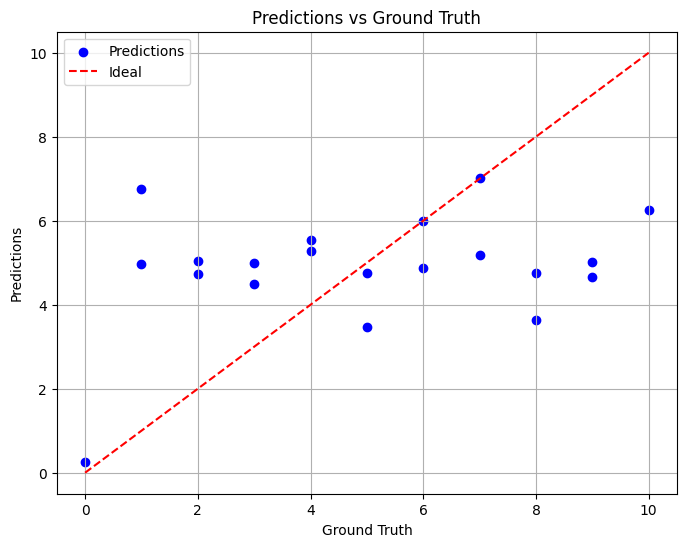

In [5]:
plot_results(results)

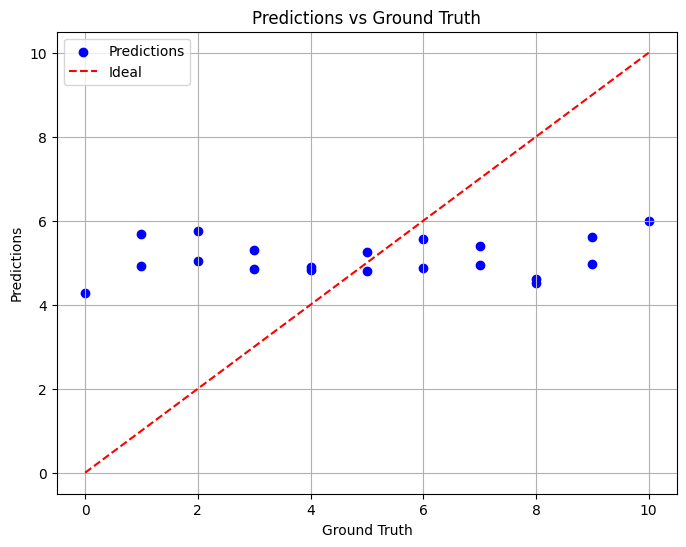

In [18]:
plot_results(de_results)

In [19]:
calculate_mse(de_results)

8.236704999999997

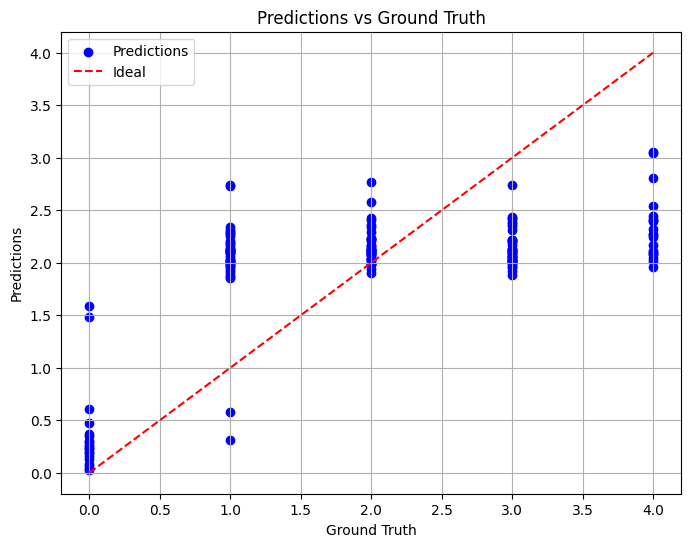

In [9]:
plot_results(de_l2r_results)

In [3]:
plot_results(l2r_results)

NameError: name 'plot_results' is not defined

In [12]:
calculate_mse(de_l2r_results)

0.9095644

In [6]:
calculate_mse(l2r_results)

0.056847775

In [3]:
PoisonDetector.denormalize_results(results, graph='linear', graph_size=20)

[(8.968194842338562, 3.8000000566244125),
 (9.485174596309662, 5.70000022649765),
 (0.47558663599193096, 0.0),
 (9.453060626983643, 1.9000000283122063),
 (9.573484897613525, 3.8000000566244125),
 (9.846915125846863, 13.29999977350235),
 (9.27091234922409, 11.4000004529953),
 (12.834872126579285, 1.9000000283122063),
 (9.016942799091339, 9.5),
 (10.050535380840302, 7.600000113248825),
 (10.499243080615997, 7.600000113248825),
 (9.527796924114227, 17.0999995470047),
 (6.890564739704132, 15.20000022649765),
 (8.548364460468292, 5.70000022649765),
 (11.392878234386444, 11.4000004529953),
 (6.613136261701584, 9.5),
 (13.322307527065277, 13.29999977350235),
 (9.01991331577301, 15.20000022649765),
 (8.86573013663292, 17.0999995470047),
 (11.884592175483704, 19.0)]

In [1]:
import PoisonDetector


In [3]:
from PoisonDetector import GraphGenerator
graph='ring'
graph_size=20
GP = GraphGenerator(size=graph_size)
g = GP.selectGraph(graph)
distances, max_distance = PoisonDetector.calculate_distances(g)
print(distances)

{0: 0, 1: 1, 19: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 9, 12: 8, 13: 7, 14: 6, 15: 5, 16: 4, 17: 3, 18: 2}


In [4]:
normalized_distances = PoisonDetector.normalize_distances(distances, max_distance)
print(normalized_distances)

{0: 0.0, 1: 0.1, 19: 0.1, 2: 0.2, 3: 0.3, 4: 0.4, 5: 0.5, 6: 0.6, 7: 0.7, 8: 0.8, 9: 0.9, 10: 1.0, 11: 0.9, 12: 0.8, 13: 0.7, 14: 0.6, 15: 0.5, 16: 0.4, 17: 0.3, 18: 0.2}


In [5]:
denormalized_distances = PoisonDetector.denormalize_distances(normalized_distances, max_distance)
print(denormalized_distances)

{0: 0.0, 1: 1.0, 19: 1.0, 2: 2.0, 3: 3.0, 4: 4.0, 5: 5.0, 6: 6.0, 7: 7.0, 8: 8.0, 9: 9.0, 10: 10.0, 11: 9.0, 12: 8.0, 13: 7.0, 14: 6.0, 15: 5.0, 16: 4.0, 17: 3.0, 18: 2.0}


In [1]:
import PoisonDetector

## Dataset: out of domain, alter 3, linear 8

#### all

In [3]:
PoisonDetector.run(adv_root_dir='Sequences/otf-alt3-linear8/', clean_root_dir='Sequences/clean/', model_path='reg_alt3_model.pth',is_binary=False, is_regression=True, graph='linear', graph_size=8)

Train size: 128, Test size: 32
Train size: 128, Test size: 32
Epoch 1/500, Loss: 0.13065430521965027
Epoch 2/500, Loss: 0.0929734855890274
Epoch 3/500, Loss: 0.15511859953403473
Epoch 4/500, Loss: 0.09972450137138367
Epoch 5/500, Loss: 0.06552823632955551
Epoch 6/500, Loss: 0.035233259201049805
Epoch 7/500, Loss: 0.0954860970377922
Epoch 8/500, Loss: 0.0758512020111084
Epoch 9/500, Loss: 0.12151409685611725
Epoch 10/500, Loss: 0.085239939391613
Epoch 11/500, Loss: 0.10941582173109055
Epoch 12/500, Loss: 0.07916662842035294
Epoch 13/500, Loss: 0.05418570339679718
Epoch 14/500, Loss: 0.09447294473648071
Epoch 15/500, Loss: 0.09551523625850677
Epoch 16/500, Loss: 0.05673003941774368
Epoch 17/500, Loss: 0.16365018486976624
Epoch 18/500, Loss: 0.10307905077934265
Epoch 19/500, Loss: 0.02458217367529869
Epoch 20/500, Loss: 0.13390718400478363
Epoch 21/500, Loss: 0.06520607322454453
Epoch 22/500, Loss: 0.171150803565979
Epoch 23/500, Loss: 0.06935052573680878
Epoch 24/500, Loss: 0.12424458563

#### first 100

In [4]:
PoisonDetector.run(adv_root_dir='Sequences/otf-alt3-linear8', clean_root_dir='Sequences/clean/', model_path='otf_alt3_l8_first100_model.pth',is_binary=False, is_regression=True, graph='linear', graph_size=8, seq_range=(0,100))

Train size: 128, Test size: 32
Train size: 128, Test size: 32
Epoch 1/500, Loss: 0.1335606575012207
Epoch 2/500, Loss: 0.05587457865476608
Epoch 3/500, Loss: 0.12270943820476532
Epoch 4/500, Loss: 0.08371426165103912
Epoch 5/500, Loss: 0.08091673254966736
Epoch 6/500, Loss: 0.10230995714664459
Epoch 7/500, Loss: 0.06697645783424377
Epoch 8/500, Loss: 0.15140052139759064
Epoch 9/500, Loss: 0.10544028878211975
Epoch 10/500, Loss: 0.09547238051891327
Epoch 11/500, Loss: 0.11348070204257965
Epoch 12/500, Loss: 0.06056146323680878
Epoch 13/500, Loss: 0.12138742208480835
Epoch 14/500, Loss: 0.14476630091667175
Epoch 15/500, Loss: 0.16020426154136658
Epoch 16/500, Loss: 0.12164663523435593
Epoch 17/500, Loss: 0.17048999667167664
Epoch 18/500, Loss: 0.12318440526723862
Epoch 19/500, Loss: 0.051939934492111206
Epoch 20/500, Loss: 0.11593513935804367
Epoch 21/500, Loss: 0.11515367776155472
Epoch 22/500, Loss: 0.11031341552734375
Epoch 23/500, Loss: 0.11100152134895325
Epoch 24/500, Loss: 0.11877

#### 75 - 200

In [5]:
PoisonDetector.run(adv_root_dir='Sequences/otf-alt3-linear8', clean_root_dir='Sequences/clean/', model_path='otf_alt3_l8_last100_model.pth',is_binary=False, is_regression=True, graph='linear', graph_size=8, seq_range=(75,None))

Train size: 128, Test size: 32
Train size: 128, Test size: 32
Epoch 1/500, Loss: 0.1048813909292221
Epoch 2/500, Loss: 0.12433915585279465
Epoch 3/500, Loss: 0.08252382278442383
Epoch 4/500, Loss: 0.12978681921958923
Epoch 5/500, Loss: 0.0961846113204956
Epoch 6/500, Loss: 0.05746312811970711
Epoch 7/500, Loss: 0.1095871701836586
Epoch 8/500, Loss: 0.17486074566841125
Epoch 9/500, Loss: 0.08929294347763062
Epoch 10/500, Loss: 0.06366358697414398
Epoch 11/500, Loss: 0.11175790429115295
Epoch 12/500, Loss: 0.06534631550312042
Epoch 13/500, Loss: 0.08395113795995712
Epoch 14/500, Loss: 0.09432801604270935
Epoch 15/500, Loss: 0.13321685791015625
Epoch 16/500, Loss: 0.08151613920927048
Epoch 17/500, Loss: 0.11956771463155746
Epoch 18/500, Loss: 0.03842853009700775
Epoch 19/500, Loss: 0.09766273200511932
Epoch 20/500, Loss: 0.10291427373886108
Epoch 21/500, Loss: 0.03860069438815117
Epoch 22/500, Loss: 0.06341752409934998
Epoch 23/500, Loss: 0.10969039797782898
Epoch 24/500, Loss: 0.13914962

## Dataset: ofd, alter 5, linear 8

In [ ]:
PoisonDetector.run(adv_root_dir='Sequences')

## Dataset: backdoor, alter 3, linear 20

In [4]:
PoisonDetector.run(adv_root_dir='Sequences/bkd-alt3-linear20/', clean_root_dir='Sequences/clean/', model_path='reg_alt3_model.pth',is_binary=False, is_regression=True, graph='linear', graph_size=20)

Train size: 16, Test size: 4
Train size: 16, Test size: 4
Epoch 1/500, Loss: 0.06468673795461655
Epoch 2/500, Loss: 0.16532139480113983
Epoch 3/500, Loss: 0.046846773475408554
Epoch 4/500, Loss: 0.13269232213497162
Epoch 5/500, Loss: 0.09044943004846573
Epoch 6/500, Loss: 0.11456558853387833
Epoch 7/500, Loss: 0.12684641778469086
Epoch 8/500, Loss: 0.06722898781299591
Epoch 9/500, Loss: 0.025921309366822243
Epoch 10/500, Loss: 0.07952699810266495
Epoch 11/500, Loss: 0.07181844115257263
Epoch 12/500, Loss: 0.07194627076387405
Epoch 13/500, Loss: 0.0554044134914875
Epoch 14/500, Loss: 0.07143422216176987
Epoch 15/500, Loss: 0.04851945862174034
Epoch 16/500, Loss: 0.05121646821498871
Epoch 17/500, Loss: 0.04178280755877495
Epoch 18/500, Loss: 0.037282466888427734
Epoch 19/500, Loss: 0.03662480041384697
Epoch 20/500, Loss: 0.05152153968811035
Epoch 21/500, Loss: 0.06912609189748764
Epoch 22/500, Loss: 0.027764176949858665
Epoch 23/500, Loss: 0.019260473549365997
Epoch 24/500, Loss: 0.00268

## Database: backdoor, all, linear 8

In [7]:
PoisonDetector.run(adv_root_dir='Sequences/bkd-all-linear8/', clean_root_dir='Sequences/clean/', model_path='bkd_all_l8_model.pth',is_binary=False, is_regression=True, graph='linear', graph_size=8)

Train size: 128, Test size: 32
Train size: 128, Test size: 32
Epoch 1/500, Loss: 0.06806092709302902
Epoch 2/500, Loss: 0.04689551144838333
Epoch 3/500, Loss: 0.017007920891046524
Epoch 4/500, Loss: 0.010004818439483643
Epoch 5/500, Loss: 0.007113510277122259
Epoch 6/500, Loss: 0.0161350816488266
Epoch 7/500, Loss: 0.013065651059150696
Epoch 8/500, Loss: 0.008413809351623058
Epoch 9/500, Loss: 0.017034627497196198
Epoch 10/500, Loss: 0.008717087097465992
Epoch 11/500, Loss: 0.012146610766649246
Epoch 12/500, Loss: 0.03648640960454941
Epoch 13/500, Loss: 0.04170089215040207
Epoch 14/500, Loss: 0.017242692410945892
Epoch 15/500, Loss: 0.0233641155064106
Epoch 16/500, Loss: 0.005697249434888363
Epoch 17/500, Loss: 0.005153287202119827
Epoch 18/500, Loss: 0.0064139897003769875
Epoch 19/500, Loss: 0.011121265590190887
Epoch 20/500, Loss: 0.011415183544158936
Epoch 21/500, Loss: 0.008928189985454082
Epoch 22/500, Loss: 0.006046804133802652
Epoch 23/500, Loss: 0.014661282300949097
Epoch 24/50

In [17]:
res, de_res = PoisonDetector.predict(preditc_dir='Sequences/bkd-all-linear8-test/', model_path='bkd_all_l8_model.pth', graph='linear', graph_size=8)

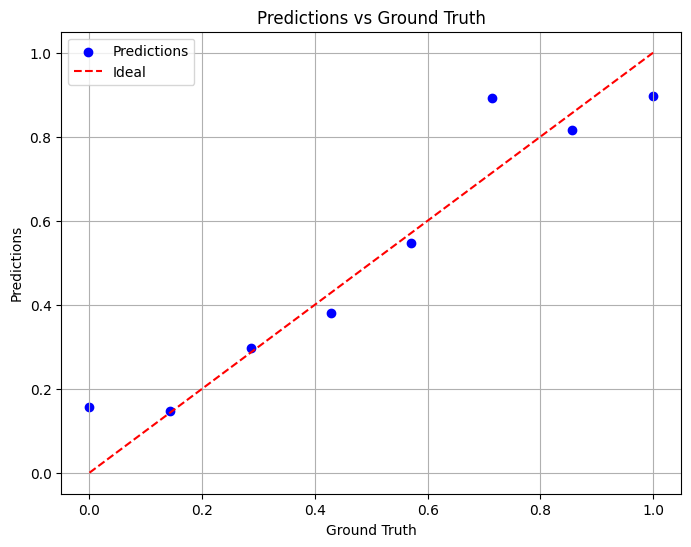

In [18]:
plot_results(res)

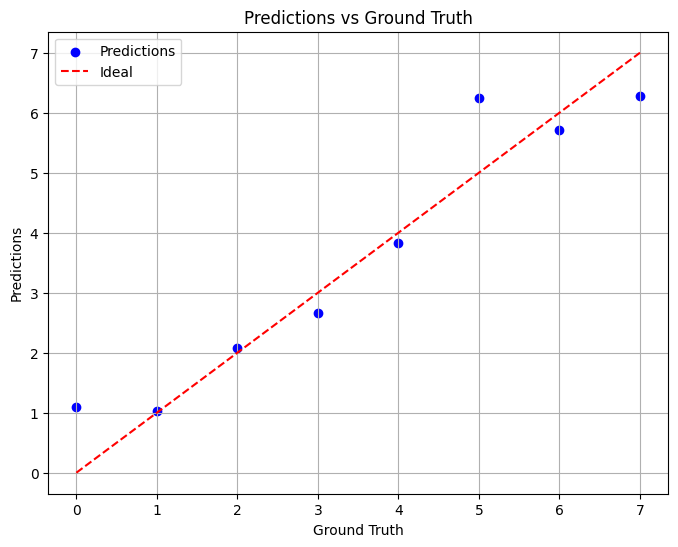

In [19]:
plot_results(de_res)

## Database: backdoor, all, linear 20

In [20]:
PoisonDetector.run(adv_root_dir='Sequences/bkd-all-linear20/', clean_root_dir='Sequences/clean/', model_path='bkd_all_l20_model.pth',is_binary=False, is_regression=True, graph='linear', graph_size=20)

Train size: 352, Test size: 88
Train size: 352, Test size: 88
Epoch 1/500, Loss: 0.2881821095943451
Epoch 2/500, Loss: 0.0570983923971653
Epoch 3/500, Loss: 0.16693705320358276
Epoch 4/500, Loss: 0.0073474980890750885
Epoch 5/500, Loss: 0.10534954071044922
Epoch 6/500, Loss: 0.021609943360090256
Epoch 7/500, Loss: 0.0012915938859805465
Epoch 8/500, Loss: 0.0014625088078901172
Epoch 9/500, Loss: 0.030245933681726456
Epoch 10/500, Loss: 0.003781262319535017
Epoch 11/500, Loss: 0.015965817496180534
Epoch 12/500, Loss: 0.027770619839429855
Epoch 13/500, Loss: 0.013620471581816673
Epoch 14/500, Loss: 0.0038362666964530945
Epoch 15/500, Loss: 0.0025554245803505182
Epoch 16/500, Loss: 0.01643192768096924
Epoch 17/500, Loss: 0.005938069894909859
Epoch 18/500, Loss: 0.005202078260481358
Epoch 19/500, Loss: 0.03964019566774368
Epoch 20/500, Loss: 0.01402320060878992
Epoch 21/500, Loss: 0.004957195837050676
Epoch 22/500, Loss: 0.003712519770488143
Epoch 23/500, Loss: 0.005599885247647762
Epoch 24

In [25]:
PoisonDetector.run(adv_root_dir='Sequences/bkd-all-linear20/', clean_root_dir='Sequences/clean/', model_path='bkd_all_l20_half_model.pth',is_binary=False, is_regression=True, graph='linear', graph_size=20, seq_range=(75,200))

Train size: 352, Test size: 88
Train size: 352, Test size: 88
Epoch 1/500, Loss: 0.027733314782381058
Epoch 2/500, Loss: 0.0024441361892968416
Epoch 3/500, Loss: 0.00018852026551030576
Epoch 4/500, Loss: 0.0885513424873352
Epoch 5/500, Loss: 0.007122483104467392
Epoch 6/500, Loss: 0.026476819068193436
Epoch 7/500, Loss: 0.02262747660279274
Epoch 8/500, Loss: 0.00774863688275218
Epoch 9/500, Loss: 0.009594004601240158
Epoch 10/500, Loss: 0.03709585592150688
Epoch 11/500, Loss: 0.014528391882777214
Epoch 12/500, Loss: 0.013117516413331032
Epoch 13/500, Loss: 0.008278447203338146
Epoch 14/500, Loss: 0.004702859558165073
Epoch 15/500, Loss: 0.0005919226678088307
Epoch 16/500, Loss: 0.007473355159163475
Epoch 17/500, Loss: 0.0017013954930007458
Epoch 18/500, Loss: 0.013584379106760025
Epoch 19/500, Loss: 0.007549429312348366
Epoch 20/500, Loss: 0.007586358115077019
Epoch 21/500, Loss: 0.013209420256316662
Epoch 22/500, Loss: 0.002130070934072137
Epoch 23/500, Loss: 0.04565998539328575
Epoch

In [22]:
res, de_res = PoisonDetector.predict(preditc_dir='Sequences/bkd-all-linear20-test/', model_path='bkd_all_l20_model.pth', graph='linear', graph_size=20)

In [2]:
res2, de_res2 = PoisonDetector.predict(preditc_dir='Sequences/bkd-all-linear20-test/', model_path='bkd_all_l20_half_model.pth', graph='linear', graph_size=20, seq_range=(75,200))

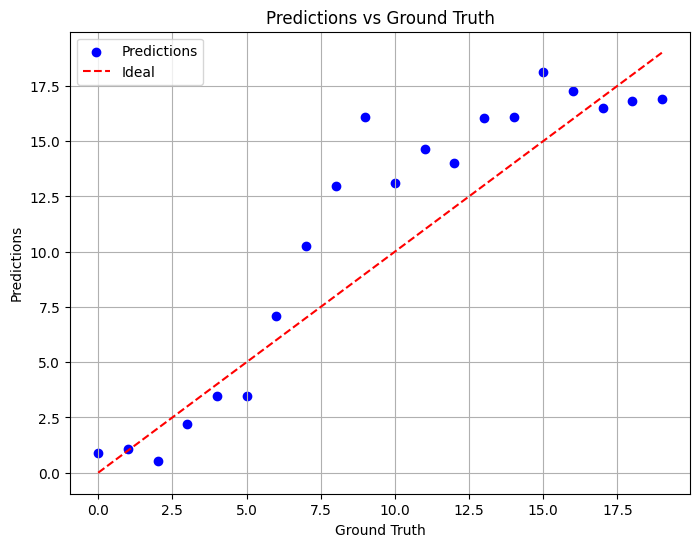

In [24]:
plot_results(de_res)

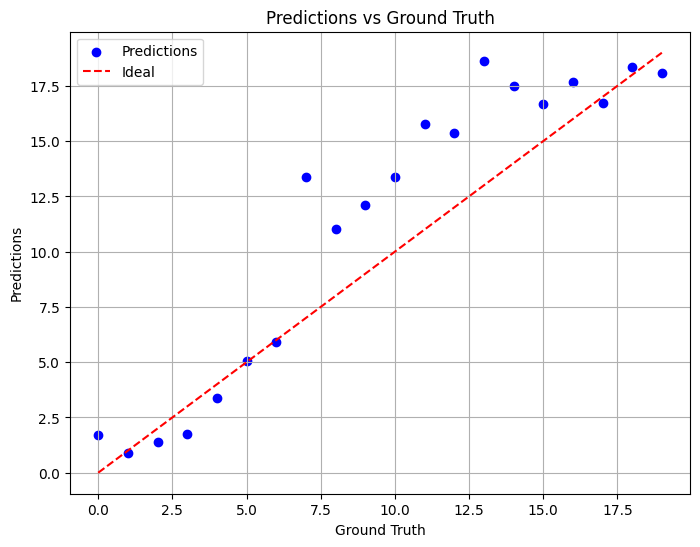

In [5]:
plot_results(de_res2)

## Test: backdoor, all, ring20

### linear20 -> ring20

In [9]:
res, de_res = PoisonDetector.predict(preditc_dir='Sequences/bkd-all-linear20-test/', model_path='bkd_all_l20_model.pth', graph='ring', graph_size=20)

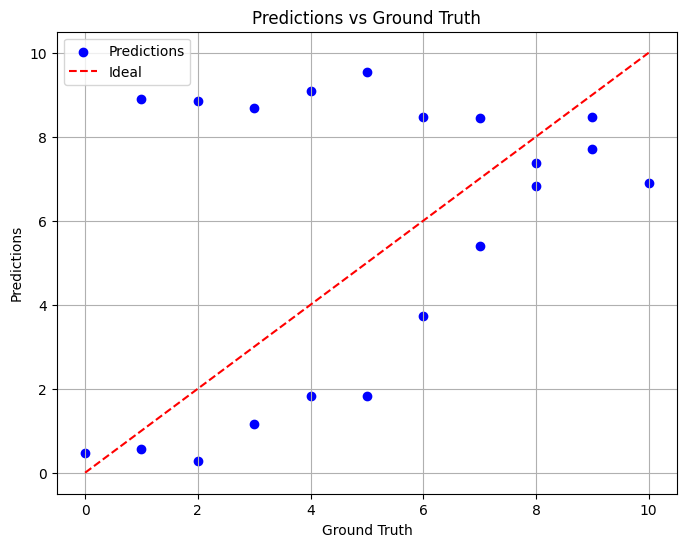

In [10]:
plot_results(de_res)